In [1]:
import pandas as pd
import numpy as np
import string
import re
import requests
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Membaca data dari file CSV
# Membaca data dari file CSV dengan memisahkan kolom-kolom terpisah
file_path = 'G:/SKRIPSI/LabelingData/DATAGACORKU.csv'
data = pd.read_csv(file_path, sep=',')

# Menampilkan lima baris pertama dari DataFrame
data.head()

No  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                                                                                                                                   Comment  \
0                                                                                                                                                                         @maiyochiru jam brp aja lah skuy   
1                                                                                   bismillah hari ini banget gaiss 👆👆👆 yukk ramaikan @eka_nf1105 @firda_yn25 @yesidwir_ @yulitayue @stnnwnti @ssnt_saadah   
2                                                                                                                                                         yuk bisa yuk dapat 😘 untuk bisa beli gacornya 🙏🏻   
3  yg pengen makan mie pedess daerah tenggarang, bisa banget nih ☝☝☝ daerah kota juga ada yg gaiss yukk merapat @nafisaintan612 @nurul_azizah0103 @aliyya.04 @nurwini_aprilia @ettysafitri_ @jamilahilaa__   
4     grand opening 💕💕💕💕💕 yuk silahkan merapat ke lokasi terbaru mie gacor 🍜🍜🍜 @ummualfatih_26 @siskaanggitaaa @geraicemilanpedas.id @septaade.s @deatriwulandari_ @ika.rizkaa @sitihartinahh @ulandari097   

   Label  
0      1  
1      1  
2      0  
3      1  
4      1

In [4]:
# Mengganti nilai NaN dengan 0 atau nilai lain yang sesuai
data['Label'].fillna(0, inplace=True)

# Mengubah kolom label ke tipe int
data['Label'] = data['Label'].astype(int)

In [5]:
# Mengetahuli kolom dan tipe data
data.dtypes

No          int64
Comment    object
Label       int32
dtype: object

In [6]:
# Mengetahui jumlah baris data dan kolom
data.shape

(123, 3)

In [7]:
# Mengetahui isi data secara rinci
print(data.info())
print(data['Label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   No       123 non-null    int64 
 1   Comment  123 non-null    object
 2   Label    123 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 2.5+ KB
None
Label
1    100
0     23
Name: count, dtype: int64


In [8]:
# Mengecek data duplikat atau data yang sama
data.duplicated().sum()


0

In [9]:
# Menghapus kolom no
data = data.drop(columns=['No'])

data.head()

Comment  \
0                                                                                                                                                                         @maiyochiru jam brp aja lah skuy   
1                                                                                   bismillah hari ini banget gaiss 👆👆👆 yukk ramaikan @eka_nf1105 @firda_yn25 @yesidwir_ @yulitayue @stnnwnti @ssnt_saadah   
2                                                                                                                                                         yuk bisa yuk dapat 😘 untuk bisa beli gacornya 🙏🏻   
3  yg pengen makan mie pedess daerah tenggarang, bisa banget nih ☝☝☝ daerah kota juga ada yg gaiss yukk merapat @nafisaintan612 @nurul_azizah0103 @aliyya.04 @nurwini_aprilia @ettysafitri_ @jamilahilaa__   
4     grand opening 💕💕💕💕💕 yuk silahkan merapat ke lokasi terbaru mie gacor 🍜🍜🍜 @ummualfatih_26 @siskaanggitaaa @geraicemilanpedas.id @septaade.s @deatriwulandari_ @ika.rizkaa @sitihartinahh @ulandari097   

   Label  
0      1  
1      1  
2      0  
3      1  
4      1

In [10]:
import re
import pandas as pd

# Fungsi untuk melakukan cleansing teks
def clean_text(text):
    if not isinstance(text, str):
        return text
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus mention (format @username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Menghapus hashtag (format #tag)
    text = re.sub(r'#\w+', '', text)
    # Menghapus emotikon dan karakter khusus
    text = re.sub(r'[^\w\s]', '', text)
    # Menghapus karakter selain huruf dan angka
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Menghapus spasi tambahan
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Membersihkan kolom 'Comment' menggunakan fungsi clean_text
data['Comment'] = data['Comment'].apply(clean_text)

data.head()

Comment  \
0                                                                                        jam brp aja lah skuy   
1                                                               bismillah hari ini banget gaiss yukk ramaikan   
2                                                                 yuk bisa yuk dapat untuk bisa beli gacornya   
3  yg pengen makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yg gaiss yukk merapat 04   
4                                  grand opening yuk silahkan merapat ke lokasi terbaru mie gacor id s rizkaa   

   Label  
0      1  
1      1  
2      0  
3      1  
4      1

In [11]:
#CASEFOLDING
# Melakukan case folding pada kolom 'Comment'
data['Comment'] = data['Comment'].str.lower()

data.head()

Comment  \
0                                                                                        jam brp aja lah skuy   
1                                                               bismillah hari ini banget gaiss yukk ramaikan   
2                                                                 yuk bisa yuk dapat untuk bisa beli gacornya   
3  yg pengen makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yg gaiss yukk merapat 04   
4                                  grand opening yuk silahkan merapat ke lokasi terbaru mie gacor id s rizkaa   

   Label  
0      1  
1      1  
2      0  
3      1  
4      1

In [12]:
# Membaca kamus normalisasi dari file CSV
normalized_word = pd.read_csv("normalisasi.csv", encoding="latin1")
normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

# Fungsi untuk menerapkan normalisasi ke teks
def normalized_term(document):
    if not isinstance(document, str):
        return document
    return ' '.join(normalized_word_dict.get(term.lower(), term) for term in document.split())

# Mengganti nilai NaN dalam kolom 'Comment' dengan string kosong
data['Comment'].fillna('', inplace=True)

# Menerapkan normalisasi ke kolom 'Comment' dan menyimpan hasilnya di kolom 'normalisasi'
data['normalisasi'] = data['Comment'].apply(normalized_term)

# Memindahkan kolom label ke paling belakang
label_column = data.pop('Label')
data['Label'] = label_column

data.head()

Comment  \
0                                                                                        jam brp aja lah skuy   
1                                                               bismillah hari ini banget gaiss yukk ramaikan   
2                                                                 yuk bisa yuk dapat untuk bisa beli gacornya   
3  yg pengen makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yg gaiss yukk merapat 04   
4                                  grand opening yuk silahkan merapat ke lokasi terbaru mie gacor id s rizkaa   

                                                                                                     normalisasi  \
0                                                                                       jam berapa saja lah skuy   
1                                                                   bismillah hari ini banget gaiss yuk ramaikan   
2                                                                    yuk bisa yuk dapat untuk bisa beli gacornya   
3  yang pengin makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yang gaiss yuk merapat 04   
4                                     grand opening yuk silakan merapat ke lokasi terbaru mie gacor id si rizkaa   

   Label  
0      1  
1      1  
2      0  
3      1  
4      1

In [13]:
# Membaca daftar stopwords dari file "stopwords.txt"
with open("stopwords.txt", "r") as file:
    stopwords = file.readlines()
stopwords = {word.strip() for word in stopwords}  # Mengubah list menjadi set

# Menambahkan stopwords tambahan
additional_stopwords = {"kalo", "bisa2", "kayaknya", "gue", "sih", "matkul2", "l1nk3d1n", "fafifuwasweswos", "nder", "braw", 
                        "ges", "nya", "an", "shg", "ya", "guys", "wkwkwk", "gua", "gais", "sender", "se7", "hahahahaft", "heeii", "deh",
                       "loh", "si", "geng", ""}
stopwords |= additional_stopwords  # Menggunakan operator | untuk menggabungkan set

# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text):
    words = text.split()  # Memisahkan teks menjadi kata-kata
    filtered_words = [word for word in words if word.lower() not in stopwords]  # Memfilter kata-kata yang bukan stopwords
    return ' '.join(filtered_words)  # Menggabungkan kata-kata yang tersisa menjadi teks kembali

# Fungsi untuk menghapus angka dari teks
def remove_numbers(text):
    words = text.split()  # Memisahkan teks menjadi kata-kata
    filtered_words = [word for word in words if not word.isdigit()]  # Memfilter kata-kata yang bukan angka
    return ' '.join(filtered_words)  # Menggabungkan kata-kata yang tersisa menjadi teks kembali

# Menghapus stopwords dari kolom 'Comment'
data['stopwords'] = data['normalisasi'].apply(remove_stopwords)

# Menghapus angka dari kolom 'stopwords'
data['stopwords'] = data['stopwords'].apply(remove_numbers)

# Memindahkan kolom label ke paling belakang
label_column = data.pop('Label')
data['Label'] = label_column

data.head()

Comment  \
0                                                                                        jam brp aja lah skuy   
1                                                               bismillah hari ini banget gaiss yukk ramaikan   
2                                                                 yuk bisa yuk dapat untuk bisa beli gacornya   
3  yg pengen makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yg gaiss yukk merapat 04   
4                                  grand opening yuk silahkan merapat ke lokasi terbaru mie gacor id s rizkaa   

                                                                                                     normalisasi  \
0                                                                                       jam berapa saja lah skuy   
1                                                                   bismillah hari ini banget gaiss yuk ramaikan   
2                                                                    yuk bisa yuk dapat untuk bisa beli gacornya   
3  yang pengin makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yang gaiss yuk merapat 04   
4                                     grand opening yuk silakan merapat ke lokasi terbaru mie gacor id si rizkaa   

                                                                            stopwords  \
0                                                                            jam skuy   
1                                                 bismillah banget gaiss yuk ramaikan   
2                                                               yuk yuk beli gacornya   
3  pengin makan mie pedess daerah tenggarang banget nih daerah kota gaiss yuk merapat   
4                grand opening yuk silakan merapat lokasi terbaru mie gacor id rizkaa   

   Label  
0      1  
1      1  
2      0  
3      1  
4      1

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks
def stemmed_term(text):
    # Memecah teks menjadi kata-kata
    words = text.split()
    # Melakukan stemming pada setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]
    # Menggabungkan kata-kata yang telah distem
    return ' '.join(stemmed_words)

# Menerapkan stemming ke kolom 'stopwords' atau 'normalisasi'
data['stemmed'] = data['stopwords'].apply(stemmed_term)

# Memindahkan kolom label ke paling belakang
label_column = data.pop('Label')
data['Label'] = label_column

data.head()

Comment  \
0                                                                                        jam brp aja lah skuy   
1                                                               bismillah hari ini banget gaiss yukk ramaikan   
2                                                                 yuk bisa yuk dapat untuk bisa beli gacornya   
3  yg pengen makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yg gaiss yukk merapat 04   
4                                  grand opening yuk silahkan merapat ke lokasi terbaru mie gacor id s rizkaa   

                                                                                                     normalisasi  \
0                                                                                       jam berapa saja lah skuy   
1                                                                   bismillah hari ini banget gaiss yuk ramaikan   
2                                                                    yuk bisa yuk dapat untuk bisa beli gacornya   
3  yang pengin makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yang gaiss yuk merapat 04   
4                                     grand opening yuk silakan merapat ke lokasi terbaru mie gacor id si rizkaa   

                                                                            stopwords  \
0                                                                            jam skuy   
1                                                 bismillah banget gaiss yuk ramaikan   
2                                                               yuk yuk beli gacornya   
3  pengin makan mie pedess daerah tenggarang banget nih daerah kota gaiss yuk merapat   
4                grand opening yuk silakan merapat lokasi terbaru mie gacor id rizkaa   

                                                                            stemmed  \
0                                                                          jam skuy   
1                                                  bismillah banget gaiss yuk ramai   
2                                                             yuk yuk beli gacornya   
3  pengin makan mie pedess daerah tenggarang banget nih daerah kota gaiss yuk rapat   
4                      grand opening yuk sila rapat lokasi baru mie gacor id rizkaa   

   Label  
0      1  
1      1  
2      0  
3      1  
4      1

In [15]:
from nltk.tokenize import word_tokenize

# Fungsi untuk melakukan tokenisasi pada teks
def tokenize_text(text):
    # Melakukan tokenisasi pada teks menggunakan nltk
    tokens = word_tokenize(text)
    return tokens

# Menerapkan tokenisasi ke kolom 'stemmed' dan menyimpan hasilnya di kolom 'tokens'
data['tokens'] = data['stemmed'].apply(tokenize_text)

# Memindahkan kolom label ke paling belakang
label_column = data.pop('Label')
data['Label'] = label_column

data.head()

Comment  \
0                                                                                        jam brp aja lah skuy   
1                                                               bismillah hari ini banget gaiss yukk ramaikan   
2                                                                 yuk bisa yuk dapat untuk bisa beli gacornya   
3  yg pengen makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yg gaiss yukk merapat 04   
4                                  grand opening yuk silahkan merapat ke lokasi terbaru mie gacor id s rizkaa   

                                                                                                     normalisasi  \
0                                                                                       jam berapa saja lah skuy   
1                                                                   bismillah hari ini banget gaiss yuk ramaikan   
2                                                                    yuk bisa yuk dapat untuk bisa beli gacornya   
3  yang pengin makan mie pedess daerah tenggarang bisa banget nih daerah kota juga ada yang gaiss yuk merapat 04   
4                                     grand opening yuk silakan merapat ke lokasi terbaru mie gacor id si rizkaa   

                                                                            stopwords  \
0                                                                            jam skuy   
1                                                 bismillah banget gaiss yuk ramaikan   
2                                                               yuk yuk beli gacornya   
3  pengin makan mie pedess daerah tenggarang banget nih daerah kota gaiss yuk merapat   
4                grand opening yuk silakan merapat lokasi terbaru mie gacor id rizkaa   

                                                                            stemmed  \
0                                                                          jam skuy   
1                                                  bismillah banget gaiss yuk ramai   
2                                                             yuk yuk beli gacornya   
3  pengin makan mie pedess daerah tenggarang banget nih daerah kota gaiss yuk rapat   
4                      grand opening yuk sila rapat lokasi baru mie gacor id rizkaa   

                                                                                           tokens  \
0                                                                                     [jam, skuy]   
1                                                          [bismillah, banget, gaiss, yuk, ramai]   
2                                                                      [yuk, yuk, beli, gacornya]   
3  [pengin, makan, mie, pedess, daerah, tenggarang, banget, nih, daerah, kota, gaiss, yuk, rapat]   
4                        [grand, opening, yuk, sila, rapat, lokasi, baru, mie, gacor, id, rizkaa]   

   Label  
0      1  
1      1  
2      0  
3      1  
4      1

In [16]:
def calc_TF(document):
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    
    # Menghitung nilai TF pada tiap kata
    total_terms = len(document)
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / total_terms
    
    return TF_dict

# Menghitung TF untuk setiap dokumen
data['TF_dict'] = data['stemmed'].apply(lambda x: calc_TF(x.split()))

# Membuat list kosong untuk menyimpan hasil perhitungan TF
tf_results = []

# Memasukkan hasil perhitungan TF ke dalam list
for idx, row in data.iterrows():
    for term, value in row['TF_dict'].items():
        tf_results.append({'Term': term, 'TF': value})

# Membuat DataFrame dari list hasil perhitungan TF
tf_results_df = pd.DataFrame(tf_results)

# Menampilkan tabel hasil perhitungan TF
print(tf_results_df.head(20))

          Term        TF
0          jam  0.500000
1         skuy  0.500000
2    bismillah  0.200000
3       banget  0.200000
4        gaiss  0.200000
5          yuk  0.200000
6        ramai  0.200000
7          yuk  0.500000
8         beli  0.250000
9     gacornya  0.250000
10      pengin  0.076923
11       makan  0.076923
12         mie  0.076923
13      pedess  0.076923
14      daerah  0.153846
15  tenggarang  0.076923
16      banget  0.076923
17         nih  0.076923
18        kota  0.076923
19       gaiss  0.076923


In [17]:
#Menghitung DF
def hitung_DF(kamus_TF):
    frekuensi_DF = {}
    # Menelusuri kamus TF dari setiap dokumen dan menambahkan
    # pasangan (term, dokumen) pada kamus hitung_DF
    for dokumen in kamus_TF:
        for term in dokumen:
            if term in frekuensi_DF:
                frekuensi_DF[term] += 1
            else:
                frekuensi_DF[term] = 1
    return frekuensi_DF

DF = hitung_DF(data["TF_dict"])

# Konversi kamus DF ke dalam DataFrame
df_df = pd.DataFrame(list(DF.items()), columns=['Term', 'DF'])

# Menampilkan tabel hasil perhitungan DF
print(df_df.head(20))

          Term  DF
0          jam   2
1         skuy   2
2    bismillah   7
3       banget  23
4        gaiss   2
5          yuk  45
6        ramai   1
7         beli  11
8     gacornya   6
9       pengin   3
10       makan   9
11         mie  32
12      pedess   1
13      daerah   1
14  tenggarang   5
15         nih  13
16        kota   1
17       rapat   5
18       grand   3
19     opening   3


In [18]:
# Menghitung IDF
def calc_IDF(n_document, DF):
    IDF_Dict = {}
    for term in DF:
        IDF_Dict[term] = np.log2(n_document / (DF[term] + 1))
    return IDF_Dict

# Jumlah dokumen
n_document = len(data)

# Menghitung IDF
IDF = calc_IDF(n_document, DF)

# Membuat DataFrame untuk menyimpan hasil perhitungan IDF
idf_df = pd.DataFrame(IDF.items(), columns=['Term', 'IDF'])

# Menampilkan tabel hasil perhitungan IDF
print(idf_df.head(20))

          Term       IDF
0          jam  5.357552
1         skuy  5.357552
2    bismillah  3.942515
3       banget  2.357552
4        gaiss  5.357552
5          yuk  1.418953
6        ramai  5.942515
7         beli  3.357552
8     gacornya  4.135160
9       pengin  4.942515
10       makan  3.620586
11         mie  1.898120
12      pedess  5.942515
13      daerah  5.942515
14  tenggarang  4.357552
15         nih  3.135160
16        kota  5.942515
17       rapat  4.357552
18       grand  4.942515
19     opening  4.942515


In [19]:
# Fungsi untuk menghitung TF-IDF
def calc_TF_IDF(TF, IDF):
    TF_IDF_Dict = {}
    # Untuk setiap term dalam TF
    for term in TF:
        # Mengalikan nilai TF dengan nilai IDF
        TF_IDF_Dict[term] = TF[term] * IDF[term]
    return TF_IDF_Dict

# Menerapkan fungsi calc_TF_IDF ke setiap dokumen dalam DataFrame
data['TF-IDF_dict'] = data['TF_dict'].apply(lambda x: calc_TF_IDF(x, IDF))

# Membuat list kosong untuk menyimpan hasil perhitungan TF-IDF
tf_idf_results = []

# Memasukkan hasil perhitungan TF-IDF ke dalam list
for idx, row in data.iterrows():
    for term, value in row['TF-IDF_dict'].items():
        tf_idf_results.append({'Term': term, 'TF-IDF': value})

# Membuat DataFrame dari list hasil perhitungan TF-IDF
tf_idf_results_df = pd.DataFrame(tf_idf_results)

# Menampilkan tabel hasil perhitungan TF-IDF
print(tf_idf_results_df.head(20))

          Term    TF-IDF
0          jam  2.678776
1         skuy  2.678776
2    bismillah  0.788503
3       banget  0.471510
4        gaiss  1.071510
5          yuk  0.283791
6        ramai  1.188503
7          yuk  0.709476
8         beli  0.839388
9     gacornya  1.033790
10      pengin  0.380193
11       makan  0.278507
12         mie  0.146009
13      pedess  0.457117
14      daerah  0.914233
15  tenggarang  0.335196
16      banget  0.181350
17         nih  0.241166
18        kota  0.457117
19       gaiss  0.412119


In [20]:
# Membuat fungsi untuk menghitung kemunculan frekuensi term persuasif dan tidak persuasif
def hitung_frekuensi_persuasif_tidakpersuasif(data, term):
    frekuensi_persuasif = 0
    frekuensi_tidakpersuasif = 0
    # Menelusuri setiap baris data
    for idx, row in data.iterrows():
        # Jika term ada dalam TF-IDF dict dan memiliki nilai TF-IDF yang lebih besar dari 0
        if term in row['TF-IDF_dict'] and row['TF-IDF_dict'][term] > 0:
            # Jika label persuasif, tambahkan ke frekuensi_persuasif
            if row['Label'] == 1:
                frekuensi_persuasif += 1
            # Jika label tidak persuasif, tambahkan ke frekuensi_tidakpersuasif
            elif row['Label'] == 0:
                frekuensi_tidakpersuasif += 0
    return frekuensi_persuasif, frekuensi_tidakpersuasif

# Membuat list term yang akan dihitung frekuensi persuasif dan tidakpersuasif
list_term = ['mantap', 'enak', 'sukses']

# Membuat list kosong untuk menyimpan hasil perhitungan frekuensi persuasif dan tidakpersuasif
frekuensi_results = []

# Memasukkan hasil perhitungan frekuensi persuasif dan tidakpersuasif ke dalam list
for term in list_term:
    frekuensi_persuasif, frekuensi_tidakpersuasif = hitung_frekuensi_persuasif_tidakpersuasif(data, term)
    frekuensi_results.append({'Term': term, 'Persuasif': frekuensi_persuasif, 'tidakpersuasif': frekuensi_tidakpersuasif})

# Membuat DataFrame dari list hasil perhitungan frekuensi persuasif dan tidak persuasif
frekuensi_df = pd.DataFrame(frekuensi_results)

# Menampilkan tabel hasil perhitungan frekuensi persuasif dan tidakpersuasif
print(frekuensi_df)

     Term  Persuasif  tidakpersuasif
0  mantap          4               0
1    enak         14               0
2  sukses          4               0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Definisikan X dan y
X = data['stemmed']
y = data['Label']

# Memisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Menginisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan vectorization pada data latih dan uji
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

# Tampilkan panjang data latih dan data uji
print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

# Gabungkan data latih dengan labelnya
#train_df = pd.DataFrame({'term': [], 'label': []})
#for text, label in zip(x_train, y_train):
    #terms = text.split()  # Pisahkan teks menjadi term
    #train_df = pd.concat([train_df, pd.DataFrame({'term': terms, 'label': label})])

# Gabungkan data uji dengan labelnya
#test_df = pd.DataFrame({'term': [], 'label': []})
#for text, label in zip(x_test, y_test):
    #terms = text.split()  # Pisahkan teks menjadi term
    #test_df = pd.concat([test_df, pd.DataFrame({'term': terms, 'label': label})])

# Menyimpan data ke dalam file Excel
#with pd.ExcelWriter('term_datagacor.xlsx') as writer:
    #train_df.to_excel(writer, sheet_name='Train Data', index=False)
    #test_df.to_excel(writer, sheet_name='Test Data', index=False)

#print("Data training dan testing per term telah disimpan dalam file Excel (term_data.xlsx).")

x_train =  98
x_test =  25
y_train =  98
y_test =  25


In [22]:
from collections import Counter

# Menggabungkan teks persuasif dan tidak persuasif berdasarkan label
persuasif_text = ' '.join(x_train[y_train == 1])
tidakpersuasif_text = ' '.join(x_train[y_train == 0])

# Membagi teks persuasif dan tidak persuasif menjadi term
persuasif_terms = persuasif_text.split()
tidakpersuasif_terms = tidakpersuasif_text.split()

# Menghitung jumlah term pada teks persuasif dan tidak persuasif
jumlah_term_persuasif = len(persuasif_terms)
jumlah_term_tidakpersuasif = len(tidakpersuasif_terms)

# Menghitung jumlah data persuasif dan tidak persuasif pada data pelatihan
counter_train = Counter(y_train)
jumlah_data_persuasif_train = counter_train[1]
jumlah_data_tidakpersuasif_train = counter_train[0]

# Menghitung jumlah data persuasif dan tidak persuasif pada data pengujian
counter_test = Counter(y_test)
jumlah_data_persuasif_test = counter_test[1]
jumlah_data_tidakpersuasif_test = counter_test[0]

# Menampilkan jumlah data persuasif dan tidak persuasif pada data pelatihan dan pengujian
print("Jumlah data persuasif pada data training:", jumlah_data_persuasif_train)
print("Jumlah data tidak persuasif pada data training:", jumlah_data_tidakpersuasif_train)
print("Jumlah data persuasif pada data testing:", jumlah_data_persuasif_test)
print("Jumlah data tidak persuasif pada data testing:", jumlah_data_tidakpersuasif_test)

# Menampilkan jumlah term persuasif dan tidak persuasif pada data pelatihan
print("Jumlah term pada dokumen training persuasif:", jumlah_term_persuasif)
print("Jumlah term pada dokumen training tidak persuasif:", jumlah_term_tidakpersuasif)

Jumlah data persuasif pada data training: 79
Jumlah data tidak persuasif pada data training: 19
Jumlah data persuasif pada data testing: 21
Jumlah data tidak persuasif pada data testing: 4
Jumlah term pada dokumen training persuasif: 505
Jumlah term pada dokumen training tidak persuasif: 75


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Melakukan vectorization pada data latih
x_train_vec = vectorizer.fit_transform(x_train)

# Melakukan vectorization pada data uji
x_test_vec = vectorizer.transform(x_test)

In [24]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Classifier
naive_bayes = MultinomialNB()

# Melatih model pada data latih yang telah disesuaikan
naive_bayes.fit(X_train_tfidf,y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import confusion_matrix

# Lakukan prediksi pada data uji
y_pred = naive_bayes.predict(x_test_vec)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2  2]
 [ 1 20]]


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['0', '1'])
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Cetak hasil evaluasi
print('Akurasi Model Naive Bayes :', '{:.2f}%'.format(accuracy * 100))
print('Rata-Rata Precision :', '{:.2f}%'.format(precision * 100))
print('Rata-Rata Recall :', '{:.2f}%'.format(recall * 100))
print('Rata-Rata F1-score :', '{:.2f}%'.format(f1 * 100))
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes : 88.00%
Rata-Rata Precision : 87.03%
Rata-Rata Recall : 88.00%
Rata-Rata F1-score : 87.28%

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.91      0.95      0.93        21

    accuracy                           0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25



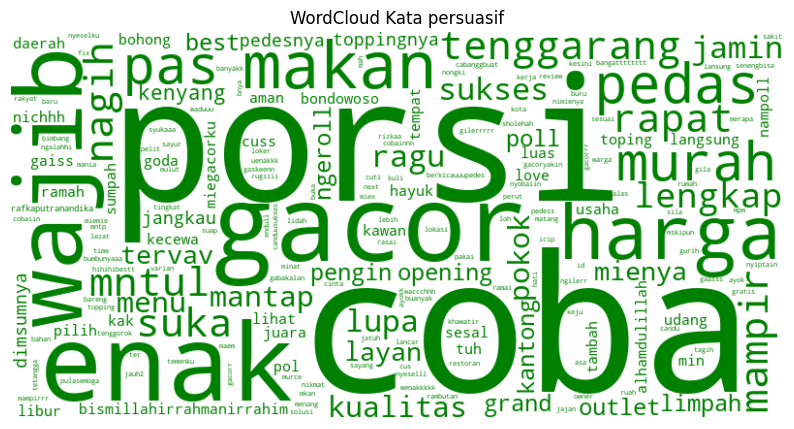

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk mengembalikan warna hijau untuk setiap kata
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'rgb(0, 128, 0)'  # Warna hijau dalam format RGB

# Ambil data berdasarkan label
persuasif_data = data[data['Label'] == 1]
tidakpersuasif_data = data[data['Label'] == 0]

# Gabungkan semua teks menjadi satu teks panjang untuk masing-masing kelompok
all_text_persuasif = ' '.join(persuasif_data['stemmed'])
all_text_tidakpersuasif = ' '.join(tidakpersuasif_data['stemmed'])

# Buat set kata-kata unik dari teks positif dan negatif
words_in_persuasif = set(all_text_persuasif.split())
words_in_tidakpersuasif = set(all_text_tidakpersuasif.split())

# Filter teks persuasif untuk hanya memasukkan kata-kata yang tidak ada di teks tidak persuasif
filtered_text_persuasif = ' '.join(word for word in all_text_persuasif.split() if word not in words_in_tidakpersuasif)

# Inisialisasi WordCloud dengan parameter collocations=False dan fungsi warna hijau
wordcloud_persuasif = WordCloud(width=800, height=400, background_color='white', color_func=green_color_func, collocations=False).generate(filtered_text_persuasif)

# Tampilkan WordCloud untuk kata-kata persuasif
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_persuasif, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Kata persuasif')
plt.show()

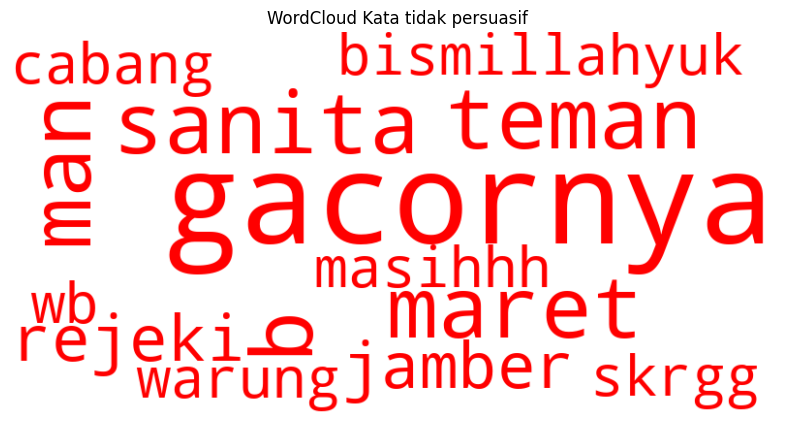

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk mengembalikan warna hijau untuk setiap kata
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'rgb(255, 0, 0)'

# Ambil data berdasarkan label
persuasif_data = data[data['Label'] == 1]
tidakpersuasif_data = data[data['Label'] == 0]

# Gabungkan semua teks menjadi satu teks panjang untuk masing-masing kelompok
all_text_tidakpersuasif = ' '.join(tidakpersuasif_data['stemmed'])

# Buat set kata-kata unik dari teks tidak persuasif
words_in_tidakpersuasif = set(all_text_tidakpersuasif.split())

# Filter teks tidak persuasif untuk hanya memasukkan kata-kata yang tidak ada di teks persuasif
filtered_text_tidakpersuasif = ' '.join(word for word in all_text_tidakpersuasif.split() if word not in words_in_persuasif)

# Inisialisasi WordCloud dengan parameter collocations=False dan fungsi warna hijau
wordcloud_tidakpersuasif = WordCloud(width=800, height=400, background_color='white', color_func=green_color_func, collocations=False).generate(filtered_text_tidakpersuasif)

# Tampilkan WordCloud untuk kata-kata tidak persuasif
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_tidakpersuasif, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Kata tidak persuasif')
plt.show()

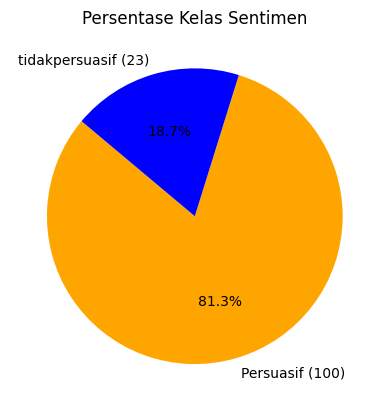

In [29]:
import matplotlib.pyplot as plt

# Data jumlah dokumen untuk setiap kelas
class_counts = data['Label'].value_counts()

# Label untuk setiap kelas dengan jumlah data
labels = [f'{label} ({count})' for label, count in zip(['Persuasif', 'tidakpersuasif'], class_counts)]

# Warna untuk setiap kelas
colors = ['orange', 'blue']

# Membuat pie chart
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Persentase Kelas Sentimen')

# Menampilkan pie chart
plt.show()